### Setup

The music analysis that I like to do can be varied and there are number of different tools that I like to use. This notebook will cover the set up and test of what is needed. As well as some additional software that should be installed on the linux system, there are number of python libraries that can be installed from the notebook as well as some . There are also a couple of helper functions that I like to use which I will define here. <br/><br/> In terms of the additional software the following is required: 

do sudo apt-get update first and set up env   Note that there is a known issue that sometimes comes up, where the <code>add-apt-repository</code> command comes up as not found. If this is the case, follow the instructions at: <a href="https://itsfoss.com/add-apt-repository-command-not-found/">https://itsfoss.com/add-apt-repository-command-not-found/</a><br/><br/> this involves <code>sudo apt-get install software-properties-common</code> followed by <code>sudo apt-get update</code>
  

- <b>Install Musescore</b> to render the music examples as sheet music <br/>
To install run the the following commands. The first lets linux know that there a location it can get MuseScore from. The second updates the linux system with this information, and the third installs it.<br/><br/>
 <code>sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable</code><br/>
  <code>sudo apt-get update</code><br/>
  <code>sudo apt-get install musescore</code> <br/> <br/>
  

- <b>Install FluidSynth</b> to work with and manipulate sounds. This is straightforward and needs the following at the command line: <br/><br/>
<code>sudo apt-get install fluidsynth</code>



The following python libraries should also be installed: <br/><br/>

- <b>music21</b>: This is a general purpose music analysis library, very handy for searching through music scores and works well with standard formats such as musicXML and midi<br/>
- <b>librosa</b>: This is a library for DSP type analysis, customised towoards music
- <b>midi2Audio, pyFluidsynth</b>: These are some wrapper libraries around FluidSynth and handy to use to interact with sound <br/><br/>
These can be installed by uncommenting out the following cell and running: 

In [15]:
#!pip install music21
#!pip install librosa
#!pip install midi2audio
#!pip install pyFluidSynth

Everything should now be set up. Test this by impoorting all the libraries. Note 

In [16]:
import librosa
import IPython
import music21 as mu
import fluidsynth
from midi2audio import FluidSynth

With music21 now in the environment, a further step is needed to let it know where MuseScore is located on the linux system. By default it should have been installed in <i>/usr/bin/musescore</i> but you can change this if needed. The important thing is that music21 can find MuseScore and use its functionality to render sheet music

In [6]:
mu.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')

Time to check everything is working: <br/>
1. Import a musicXML file to music21

In [9]:
example_1 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/1st-movement-Langsam-Schleppend-Immer-sehr-gemachlich.mxl")

2. Create a small phrase in music 21 and render to sheet music view

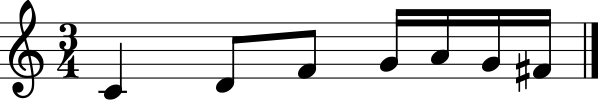

In [10]:
example_2 = mu.converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
example_2.show()

3. Play the example using a audio player<br/>
Note there is currently a limitation in JupyterLab related to the music21 <code>.show('midi')</code> command and a player does not render. To get around this, I use a small function below, which converts any given example (such as example_1 or example_2 above) to an mp3 file and then play. There are more elegant ways to do this,but this works and I also like to mp3 sound files of examples. Note that this function will create files in your directory so you either delete them after playing the example, or keep them in a different directory

In [11]:
violinSound = mu.instrument.Violin()
exampleForAudio = mu.stream.Stream()
exampleForAudio.append(violinSound)

n1 = mu.note.Note('c4')
n2 = mu.note.Note('d4')
n3 = mu.note.Note('f5')
exampleForAudio.append([n1, n2, n3])


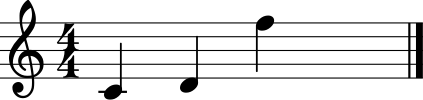

In [12]:
exampleForAudio.show()

In [13]:
def create_sound_file_from_midi(m21_data, file_name):
    m21_data.write('midi', fp = file_name + ".mid")
    fs = FluidSynth()
    fs.midi_to_audio('./' + file_name + ".mid", file_name + '.mp3')
    return(IPython.display.Audio("./" + file_name + ".mp3"))

In [14]:
create_sound_file_from_midi(exampleForAudio, "example_3")

4. Check librosa is working by running a code example from the librosa docs

In [41]:
filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 107.67 beats per minute


If everything above works, we can get to some analysis!